In [1]:
from vega import VegaLite

In [2]:
import pandas as pd
from altair import Chart, X, Y, Axis, EncodingSortField, datum

budget = pd.read_csv("https://github.com/chris1610/pbpython/raw/master/data/mn-budget-detail-2014.csv")
budget.head()


,category,detail,amount
0,UNIVERSITY OF MINNESOTA,Higher Education Asset Preservation (HEAPR) 1,42500000
1,UNIVERSITY OF MINNESOTA,Minneapolis; Tate Laboratory Renovation,56700000
2,UNIVERSITY OF MINNESOTA,Crookston; Wellness Center,10000000
3,UNIVERSITY OF MINNESOTA,Research Laboratories,8667000
4,UNIVERSITY OF MINNESOTA,Duluth; Chemical Sciences and Advanced Materia...,1500000


In [3]:
budget_top_10 = budget.sort_values(by='amount',ascending=False)[:10]


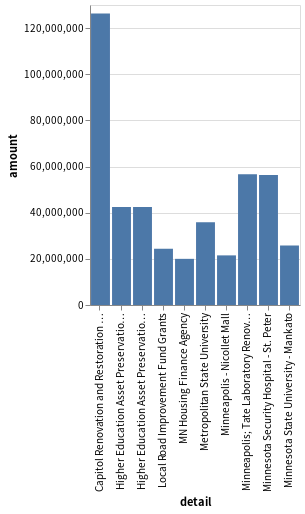

In [4]:
Chart(budget_top_10).mark_bar().encode(x='detail', y='amount')

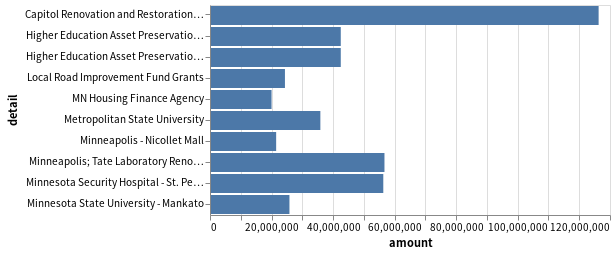

In [5]:
Chart(budget_top_10).mark_bar().encode(y='detail', x='amount')

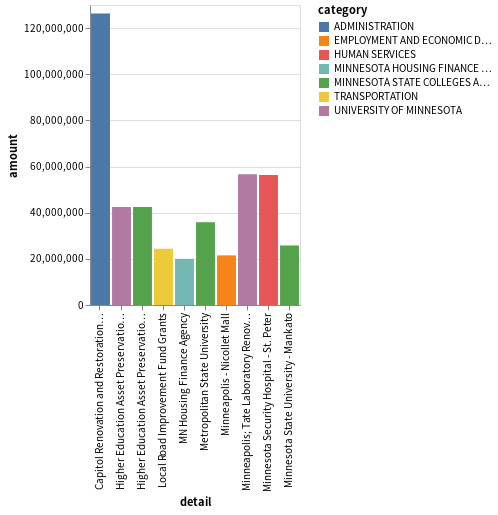

In [6]:
Chart(budget_top_10).mark_bar().encode(
    x=X('detail'),
    y=Y('amount'),
    color='category')

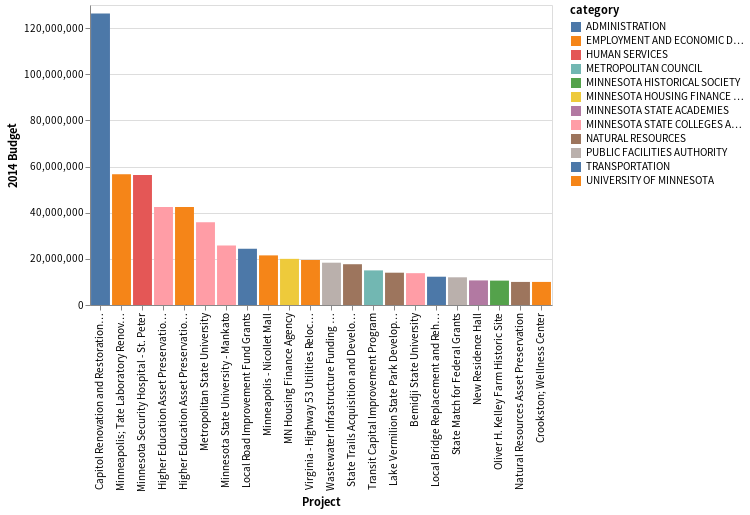

In [7]:
Chart(budget).mark_bar().encode(
    x=X('detail:O', sort=EncodingSortField(field='amount', order='descending', op='sum'),
        axis=Axis(title='Project')),
    y=Y('amount:Q',
        axis=Axis(title='2014 Budget')),
    color='category').transform_filter(
      (datum.amount >= 10000000)
        )

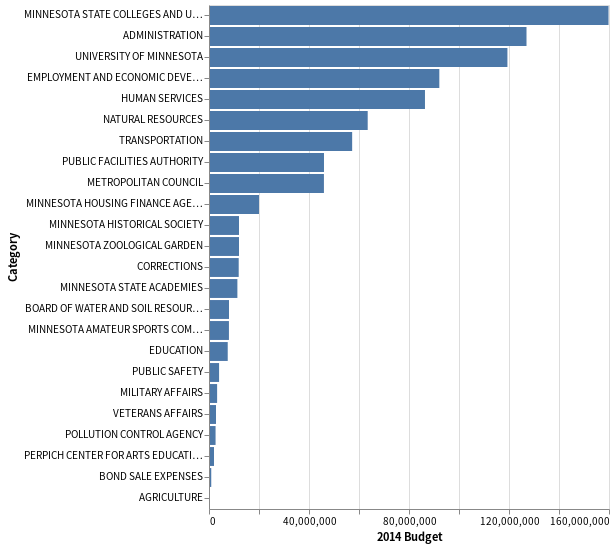

In [8]:
c = Chart(budget).mark_bar().encode(
    y=Y('category', sort=EncodingSortField(field='amount', order='descending', op='sum'),
        axis=Axis(title='Category')),
    x=X('sum(amount)',
        axis=Axis(title='2014 Budget')))
c


In [ ]:
import altair as alt
from vega_datasets import data

cars = data.cars.url

alt.Chart(cars).mark_point().encode(
    x='Horsepower:Q',
    y='Miles_per_Gallon:Q',
    color=alt.Color('Acceleration:Q', bin=alt.Bin(maxbins=5))
)